In [1]:
#Importando bibliotecas que serão usadas para construção e visualização do grafo
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import seaborn as sns
import regression as reg
import cpnet
from graph_tool import spectral
import matplotlib.pyplot as plt
import csv
import pandas as pd

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [2]:
def read_large_csv_file(file_path, limit = None):
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)
        c = 0
        for row in csv_reader:
            if limit and (c >= limit):
                break
            yield row
            c+=1

In [3]:
def write_csv_file(file_path, data):
    with open(file_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['Value 1', 'Value 2', 'Value 3'])
        for row in data:
            csv_writer.writerow(row)
def writefile(path, data):
    with open(path, 'w', newline='') as f:
        f.write(data)

In [4]:
#Criando grafo dirigido
g_2009 = Graph(directed=True) 
g_2010 = Graph(directed=True) 
g_2011 = Graph(directed=True) 
g_2012 = Graph(directed=True) 
g_2013 = Graph(directed=True) 
g_2014 = Graph(directed=True) 
g_2015 = Graph(directed=True) 
g_2016 = Graph(directed=True) 
g_2017 = Graph(directed=True) 
g_2018 = Graph(directed=True) 
g_2019 = Graph(directed=True) 
g_2020 = Graph(directed=True) 
g_2021 = Graph(directed=True) 

In [5]:
graphs = {
    '2009': {'graph': g_2009},
    '2010': {'graph': g_2010},
    '2011': {'graph': g_2011},
    '2012': {'graph': g_2012},
    '2013': {'graph': g_2013},
    '2014': {'graph': g_2014},
    '2015': {'graph': g_2015},
    '2016': {'graph': g_2016},
    '2017': {'graph': g_2017},
    '2018': {'graph': g_2018},
    '2019': {'graph': g_2019},
    '2020': {'graph': g_2020},
    '2021': {'graph': g_2021}
}

In [6]:
import heapq 
teams_list = []
values_list = []

for row in read_large_csv_file("../datasets/transfers.csv"):
    year, outTeam, outTeamName, inTeam, inTeamName,  direction, value = row[1], row[8], row[9], row[2],row[3], row[5], row[11]
    #get 120th value
    try:
        values_list.append(float(value))  # Make sure to convert the value to a float
    except ValueError:  # Skip non-numeric values
        continue
        
    if (direction=='in' and year in graphs):
        teams_list.append({"name": outTeamName, "teamId": outTeam})
        try:
            graphs[year]['graph'].add_vertex(outTeamName)
        except Exception as e:
            continue
    if (direction=='in' and year in graphs):
        teams_list.append({"name": inTeamName, "teamId": inTeam})
        try:
            graphs[year]['graph'].add_vertex(inTeamName)
        except Exception as e:
            continue
    

val_120 = heapq.nlargest(120, values_list)[-1]
print(val_120)

64000000.0


In [8]:
for row in read_large_csv_file("../datasets/transfers.csv"):
    year, outTeam, outTeamName, inTeam, inTeamName,  direction, value  = row[1], row[8], row[9], row[2],row[3], row[5], row[11]
    if(value and float(value) and float(value) > 3200000 and outTeam != 'Retired' and inTeam != "Retired" and direction == 'in' and year in graphs):
        try:
            graphs[year]['graph'].add_edge(outTeamName, inTeamName)
        except Exception as e: #caso a aresta ja exista, ignorar
            continue

In [9]:
gt_save(g_2009, 'grafo_2009.net.gz')
gt_save(g_2010, 'grafo_2010.net.gz')
gt_save(g_2011, 'grafo_2011.net.gz')
gt_save(g_2012, 'grafo_2012.net.gz')
gt_save(g_2013, 'grafo_2013.net.gz')
gt_save(g_2014, 'grafo_2014.net.gz')
gt_save(g_2015, 'grafo_2015.net.gz')
gt_save(g_2016, 'grafo_2016.net.gz')
gt_save(g_2017, 'grafo_2017.net.gz')
gt_save(g_2018, 'grafo_2018.net.gz')
gt_save(g_2019, 'grafo_2019.net.gz')
gt_save(g_2020, 'grafo_2020.net.gz')
gt_save(g_2021, 'grafo_2021.net.gz')

In [10]:
g_2009 = gt_load('grafo_2009.net.gz')
m_2009 = gt_draw.sfdp_layout(g_2009)
gt_move(g_2009, m_2009)
gt_save(g_2009, 'grafo_2009_sfdp.net.gz')
r_2009 = netpixi.render('grafo_2009_sfdp.net.gz');

In [11]:
g_2010 = gt_load('grafo_2010.net.gz')
m_2010 = gt_draw.sfdp_layout(g_2010)
gt_move(g_2010, m_2010)
gt_save(g_2010, 'grafo_2010_sfdp.net.gz')
r_2010 = netpixi.render('grafo_2010_sfdp.net.gz');

In [12]:
g_2011 = gt_load('grafo_2011.net.gz')
m_2011 = gt_draw.sfdp_layout(g_2011)
gt_move(g_2011, m_2011)
gt_save(g_2011, 'grafo_2011_sfdp.net.gz')
r_2011 = netpixi.render('grafo_2011_sfdp.net.gz');

In [13]:
g_2012 = gt_load('grafo_2012.net.gz');
m_2012 = gt_draw.sfdp_layout(g_2012);
gt_move(g_2012, m_2012);
gt_save(g_2012, 'grafo_2012_sfdp.net.gz');
r_2012 = netpixi.render('grafo_2012_sfdp.net.gz');

In [14]:
g_2013 = gt_load('grafo_2013.net.gz');
m_2013 = gt_draw.sfdp_layout(g_2013);
gt_move(g_2013, m_2013);
gt_save(g_2013, 'grafo_2013_sfdp.net.gz');
r_2013 = netpixi.render('grafo_2013_sfdp.net.gz');

In [15]:
g_2014 = gt_load('grafo_2014.net.gz');
m_2014 = gt_draw.sfdp_layout(g_2014);
gt_move(g_2014, m_2014);
gt_save(g_2014, 'grafo_2014_sfdp.net.gz');
r_2014 = netpixi.render('grafo_2014_sfdp.net.gz');

In [16]:
g_2015 = gt_load('grafo_2015.net.gz');
m_2015 = gt_draw.sfdp_layout(g_2015);
gt_move(g_2015, m_2015);
gt_save(g_2015, 'grafo_2015_sfdp.net.gz');
r_2015 = netpixi.render('grafo_2015_sfdp.net.gz');

In [17]:
g_2016 = gt_load('grafo_2016.net.gz');
m_2016 = gt_draw.sfdp_layout(g_2016);
gt_move(g_2016, m_2016);
gt_save(g_2016, 'grafo_2016_sfdp.net.gz');
r_2016 = netpixi.render('grafo_2016_sfdp.net.gz');

In [18]:
g_2017 = gt_load('grafo_2017.net.gz');
m_2017 = gt_draw.sfdp_layout(g_2017);
gt_move(g_2017, m_2017);
gt_save(g_2017, 'grafo_2017_sfdp.net.gz');
r_2017 = netpixi.render('grafo_2017_sfdp.net.gz');

In [19]:
g_2018 = gt_load('grafo_2018.net.gz');
m_2018 = gt_draw.sfdp_layout(g_2018);
gt_move(g_2018, m_2018);
gt_save(g_2018, 'grafo_2018_sfdp.net.gz');
r_2018 = netpixi.render('grafo_2018_sfdp.net.gz');

In [20]:
g_2019 = gt_load('grafo_2019.net.gz');
m_2019 = gt_draw.sfdp_layout(g_2019);
gt_move(g_2019, m_2019);
gt_save(g_2019, 'grafo_2019_sfdp.net.gz');
r_2019 = netpixi.render('grafo_2019_sfdp.net.gz');

In [21]:
g_2020 = gt_load('grafo_2020.net.gz');
m_2020 = gt_draw.sfdp_layout(g_2020);
gt_move(g_2020, m_2020);
gt_save(g_2020, 'grafo_2020_sfdp.net.gz');
r_2020 = netpixi.render('grafo_2020_sfdp.net.gz');

In [22]:
g_2021 = gt_load('grafo_2021.net.gz');
m_2021 = gt_draw.sfdp_layout(g_2021);
gt_move(g_2021, m_2021);
gt_save(g_2021, 'grafo_2021_sfdp.net.gz');
r_2021 = netpixi.render('grafo_2021_sfdp.net.gz');

In [23]:
def calcula_metricas(year):
    grafo = graphs[year]['graph']
    target = graphs[year]
    num_vertex, target['num_vertex'] = grafo.num_vertices(), grafo.num_vertices()
    num_edges, target['num_edges'] = grafo.num_edges(), grafo.num_edges()
    max_edges, target['max_edges'] = num_vertex*(num_vertex-1), num_vertex*(num_vertex-1)
    density, target['density'] = num_edges/max_edges, num_edges/max_edges
    return
    

In [24]:

for year in graphs.keys():
    calcula_metricas(year)
    print(year, '\n')
    print('num vertices: ', graphs[year]['num_vertex'], '\n')
    print('num edges: ', graphs[year]['num_edges'], '\n')
    print('max edges: ', graphs[year]['max_edges'], '\n')
    print('density: ', graphs[year]['density'], '\n')
    print('\n')

2009 

num vertices:  458 

num edges:  185 

max edges:  209306 

density:  0.0008838733720008026 



2010 

num vertices:  451 

num edges:  171 

max edges:  202950 

density:  0.0008425720620842572 



2011 

num vertices:  492 

num edges:  195 

max edges:  241572 

density:  0.0008072127564452834 



2012 

num vertices:  491 

num edges:  182 

max edges:  240590 

density:  0.0007564736688972941 



2013 

num vertices:  509 

num edges:  189 

max edges:  258572 

density:  0.0007309376111875996 



2014 

num vertices:  471 

num edges:  199 

max edges:  221370 

density:  0.0008989474635226092 



2015 

num vertices:  491 

num edges:  287 

max edges:  240590 

density:  0.00119290078556881 



2016 

num vertices:  489 

num edges:  303 

max edges:  238632 

density:  0.0012697375037714976 



2017 

num vertices:  459 

num edges:  332 

max edges:  210222 

density:  0.0015792828533645385 



2018 

num vertices:  479 

num edges:  362 

max edges:  228962 

density:

In [25]:
def plot_hist(year):
    grafo = graphs[year]['graph']
    data = gt_data(grafo)
    in_degrees = []
    for v in grafo.all_vertices():
        in_degrees.append(v.in_degree())

    out_degrees = []
    for v in grafo.all_vertices():
        out_degrees.append(v.out_degree())

    degrees = []
    for v in grafo.all_vertices():
        degrees.append(v.total_degree())
        
    data['in_degree'] = in_degrees
    data['out_degree'] = out_degrees
    data['degree'] = degrees
    data['degree'].describe()
    plt.hist(data['degree'], bins=range(0, 30))
    plt.xlim(0,30)
    plt.title(f"Histogram of Degrees in {year}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

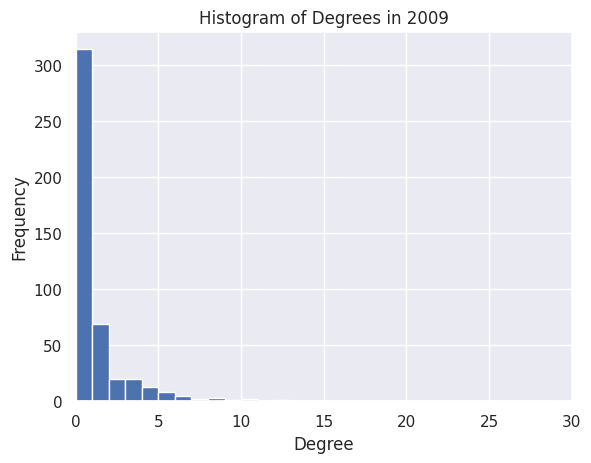

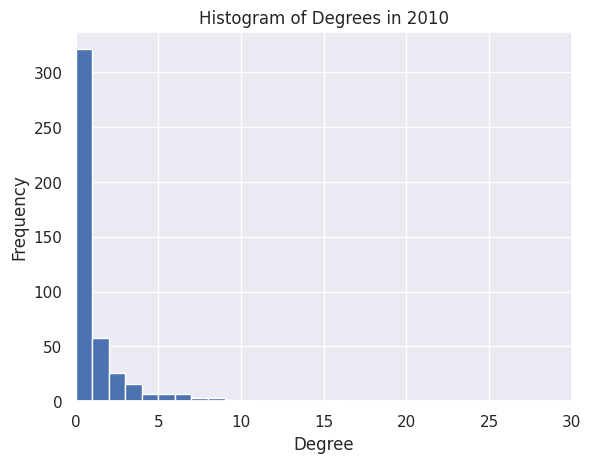

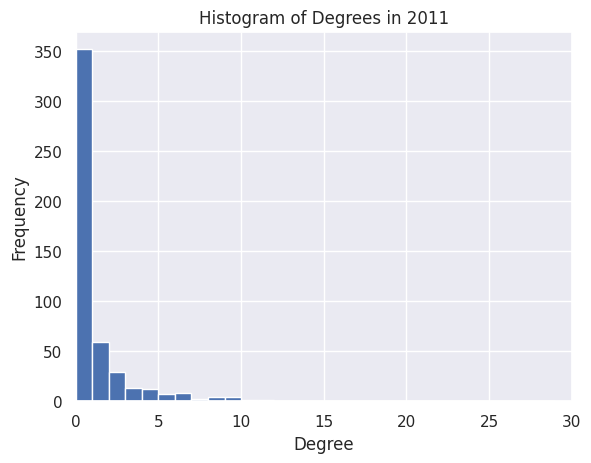

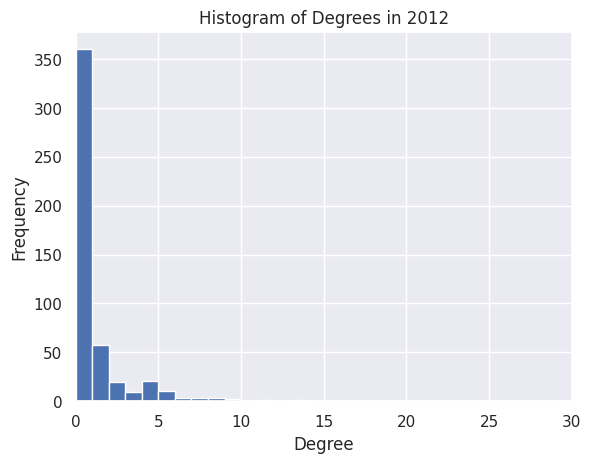

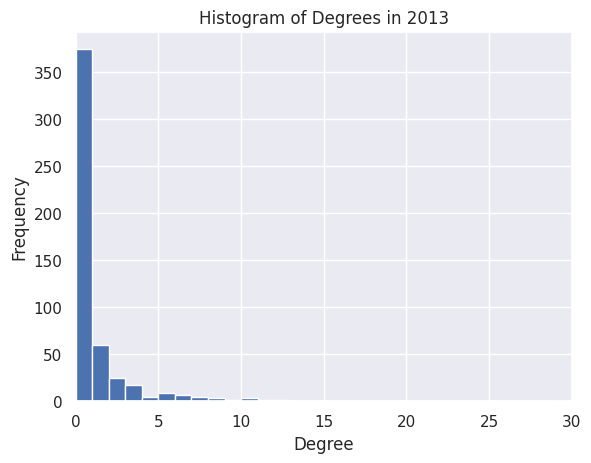

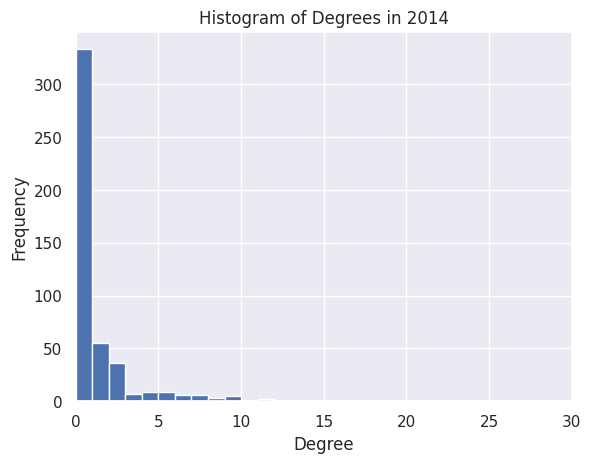

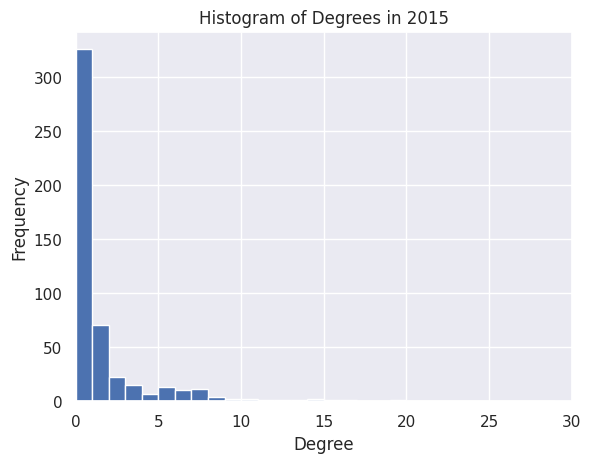

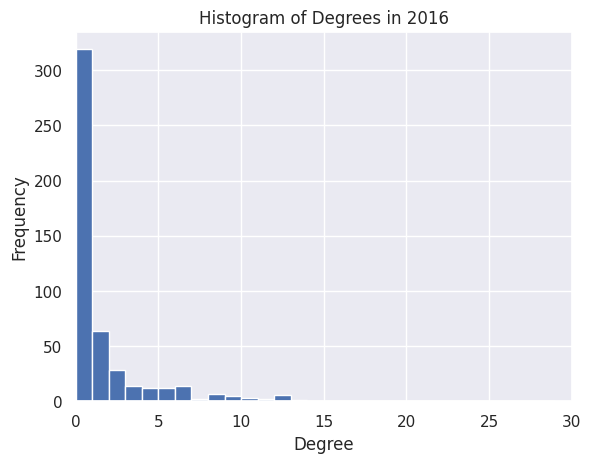

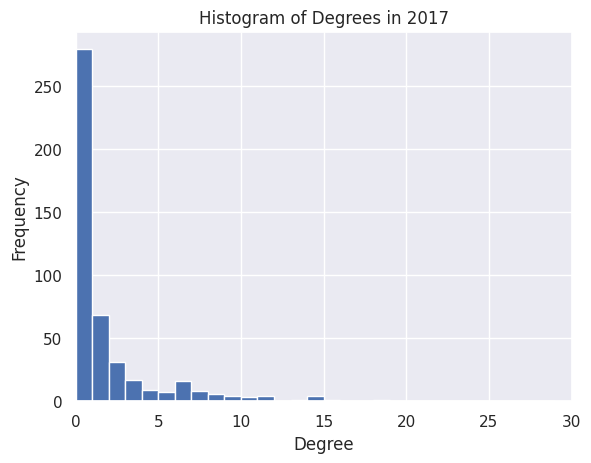

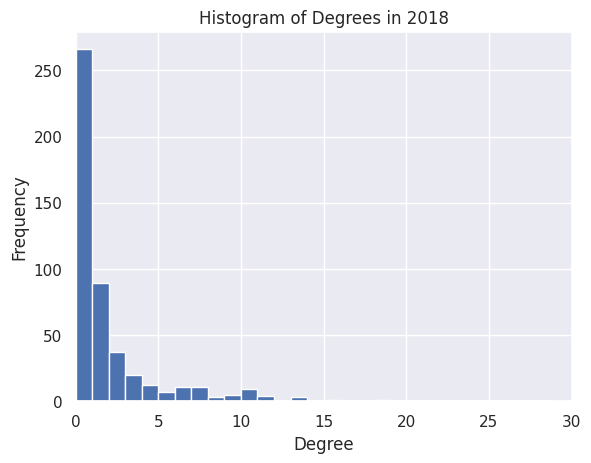

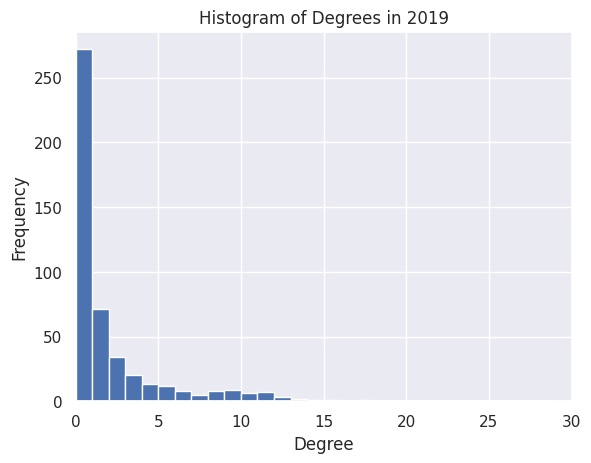

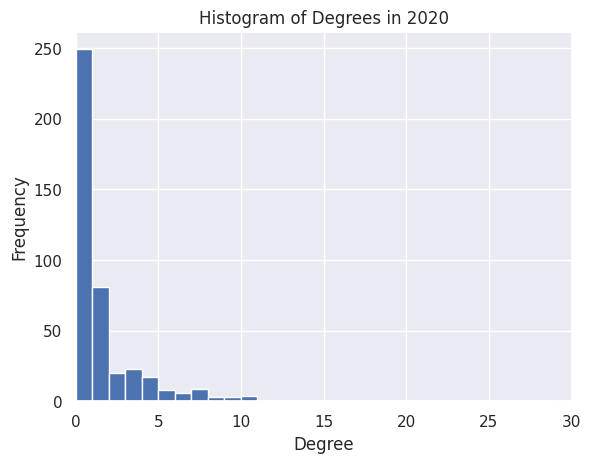

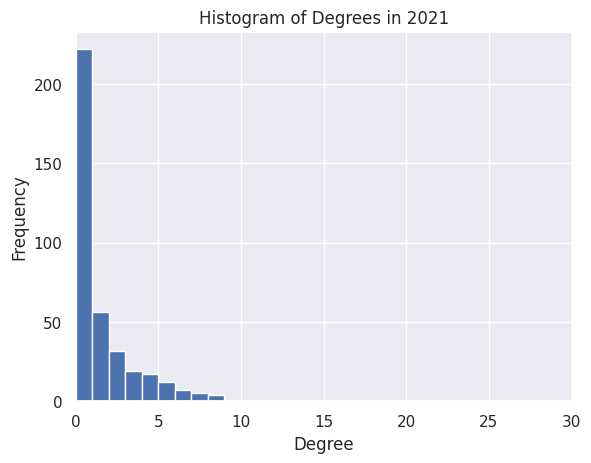

In [26]:
for year in graphs.keys():
    plt.figure()
    plot_hist(year)

In [45]:
from graph_tool import centrality


for year in graphs:
    graph = graphs[year]['graph']
    bc, _ = centrality.betweenness(graph)
    graph.add_vp('betweenness', bc)
#     print(gt_data(graph))
    writefile(f"../datasets/betweeness_{year}.csv",gt_data(graph).to_csv())



In [46]:
df_2009 = pd.read_csv("../datasets/betweeness_2009.csv")
df_2010 = pd.read_csv("../datasets/betweeness_2010.csv")
df_2020 = pd.read_csv("../datasets/betweeness_2020.csv")
df_2009['position'] = ''
df_2010['position'] = ''
df_2020['position'] = ''

In [47]:


pos_2009_port = []
pos_2009_premier = []
pos_2009_bundesliga = []
pos_2009_eredivise = []
pos_2009_laliga = []
pos_2009_ligue1 = []
pos_2009_serieA = []

pos_2020_port = []
pos_2020_premier = []
pos_2020_bundesliga = []
pos_2020_eredivise = []
pos_2020_laliga = []
pos_2020_ligue1 = []
pos_2020_serieA = []

index = 0


for row in read_large_csv_file('../datasets/classificacaoPortuguese.csv'):
    index= index+1
    if(index == 1):
        pos_2009_port = row
    elif index == 11:
        pos_2020_port = row
    
index=0

for row in read_large_csv_file('../datasets/classificacaoPremier.csv'):
    index= index+1
    if(index == 1):
        pos_2009_premier = row
    elif index == 11:
        pos_2020_premier = row
    
index = 0 
    
for row in read_large_csv_file('../datasets/classificacaoBundesliga.csv'):
    index= index+1
    if(index == 1):
        pos_2009_bundesliga = row
    elif index == 11:
        pos_2020_bundesliga = row
    
index = 0
    
for row in read_large_csv_file('../datasets/classificacaoEredivisie.csv'):
    index= index+1
    if(index == 1):
        pos_2009_eredivise = row
    elif index == 11:
        pos_2020_eredivise = row
    
index = 0
    
for row in read_large_csv_file('../datasets/classificacaoLaLiga.csv'):
    index= index+1
    if(index == 1):
        pos_2009_laliga = row
    elif index == 11:
        pos_2020_laliga = row
    
index = 0
    
for row in read_large_csv_file('../datasets/classificacaoLigue1.csv'):
    index= index+1
    if(index == 1):
        pos_2009_ligue1 = row
    elif index == 11:
        pos_2020_ligue1 = row
    
index = 0
    
for row in read_large_csv_file('../datasets/classificacaoSerieA.csv'):
    index= index+1
    if(index == 1):
        pos_2009_serieA = row
    elif index == 11:
        pos_2020_serieA = row


In [48]:
for index, row in df_2009.iterrows():
    name = row['id']
    if(name in pos_2009_port):
        df_2009.at[index, 'position'] = pos_2009_port.index(name)
    elif name in pos_2009_premier:
        df_2009.at[index, 'position'] = pos_2009_premier.index(name)
    elif name in pos_2009_bundesliga:
        df_2009.at[index, 'position'] = pos_2009_bundesliga.index(name)
    elif name in pos_2009_eredivise:
        df_2009.at[index, 'position'] = pos_2009_eredivise.index(name)
    elif name in pos_2009_laliga:
        df_2009.at[index, 'position'] = pos_2009_laliga.index(name)
    elif name in pos_2009_ligue1:
        df_2009.at[index, 'position'] = pos_2009_ligue1.index(name)
    elif name in pos_2009_serieA:
        df_2009.at[index, 'position'] = pos_2009_serieA.index(name)
    else:
        df_2009.at[index, 'position'] = None
        
        
df_2009 = df_2009.dropna(subset=['position'])
df_2009.to_csv('../datasets/test2009.csv', index=False)
df_2009['position'] = pd.to_numeric(df_2009['position'], errors='coerce')
df_2009['betweenness'] = pd.to_numeric(df_2009['betweenness'], errors='coerce')

#2010 dataframe
df_2010['betweenness'] = pd.to_numeric(df_2010['betweenness'], errors='coerce')
print(len(df_2010['betweenness']))
print(len(df_2009['position']))
merged_df = pd.merge(df_2009, df_2010, on="id")
# print((merged_df))

451
100


In [49]:


for index, row in df_2020.iterrows():
    name = row['id']
    if(name in pos_2020_port):
        df_2020.at[index, 'position'] = pos_2020_port.index(name)
    elif name in pos_2020_premier:
        df_2020.at[index, 'position'] = pos_2020_premier.index(name)
    elif name in pos_2020_bundesliga:
        df_2020.at[index, 'position'] = pos_2020_bundesliga.index(name)
    elif name in pos_2020_eredivise:
        df_2020.at[index, 'position'] = pos_2020_eredivise.index(name)
    elif name in pos_2020_laliga:
        df_2020.at[index, 'position'] = pos_2020_laliga.index(name)
    elif name in pos_2020_ligue1:
        df_2020.at[index, 'position'] = pos_2020_ligue1.index(name)
    elif name in pos_2020_serieA:
        df_2020.at[index, 'position'] = pos_2020_serieA.index(name)
    else:
        df_2020.at[index, 'position'] = None
        
        
df_2020 = df_2020.dropna(subset=['position'])
df_2020.to_csv('../datasets/test2020.csv', index=False)
df_2020['position'] = pd.to_numeric(df_2020['position'], errors='coerce')
df_2020['betweenness'] = pd.to_numeric(df_2020['betweenness'], errors='coerce')

In [50]:
# r_2009.vertex_set_key('id')
# r_2009.vertex_scale('betweenness', 10, 50)

# r_2010.vertex_set_key('id')
# r_2010.vertex_scale('betweenness', 10, 50)

# r_2011.vertex_set_key('id')
# r_2011.vertex_scale('betweenness', 10, 50)

# r_2012.vertex_set_key('id')
# r_2012.vertex_scale('betweenness', 10, 50)

# r_2013.vertex_set_key('id')
# r_2013.vertex_scale('betweenness', 10, 50)

# r_2014.vertex_set_key('id')
# r_2014.vertex_scale('betweenness', 10, 50)

# r_2015.vertex_set_key('id')
# r_2015.vertex_scale('betweenness', 10, 50)

# r_2016.vertex_set_key('id')
# r_2016.vertex_scale('betweenness', 10, 50)

# r_2017.vertex_set_key('id')
# r_2017.vertex_scale('betweenness', 10, 50)

# r_2018.vertex_set_key('id')
# r_2018.vertex_scale('betweenness', 10, 50)

# r_2019.vertex_set_key('id')
# r_2019.vertex_scale('betweenness', 10, 50)


# r_2020.vertex_set_key('id')
# r_2020.vertex_scale('betweenness', 10, 50)

# r_2021.vertex_set_key('id')
# r_2021.vertex_scale('betweenness', 10, 50)



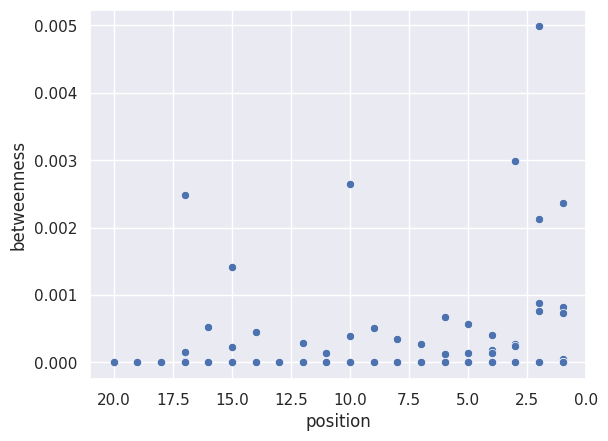

In [51]:
sns.scatterplot(x=df_2009['position'], y=df_2009['betweenness']);
plt.xlim(max(df_2009['position']+1), min(df_2009['position']-1))
plt.show()

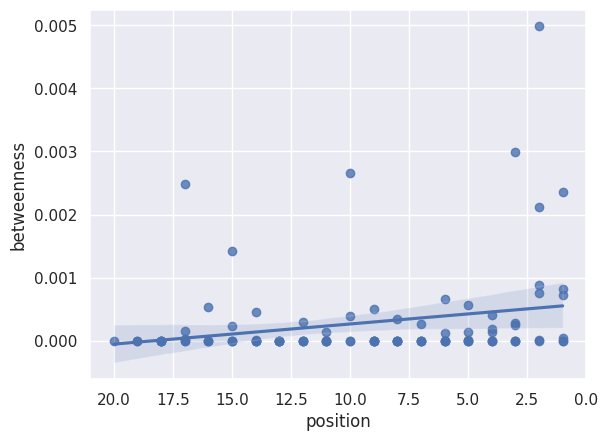

In [52]:
sns.regplot(x=df_2009['position'], y=df_2009['betweenness']);
plt.xlim(max(df_2009['position']+ 1), min(df_2009['position'])-1)
plt.show()

In [53]:
result = reg.linear(data=df_2009, formula='betweenness ~ position')

In [54]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            betweenness   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     5.522
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0208
Time:                        16:19:30   Log-Likelihood:                 580.61
No. Observations:                 100   AIC:                            -1157.
Df Residuals:                      98   BIC:                            -1152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      3.960      0.000       0.000       0.001
position   -3.195e-05   1.36e-05     -2.350      0.021   -5.89e-05   -4.97e-06
==============================================================================
Omnibus:                      107.355   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1254.812
Skew:                           3.695   Prob(JB):                    3.32e-273
Kurtosis:                      18.702   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
result.micro_summary()

variable,coefficient,std error,p-value
position,-0.000032,0.000014,0.020788


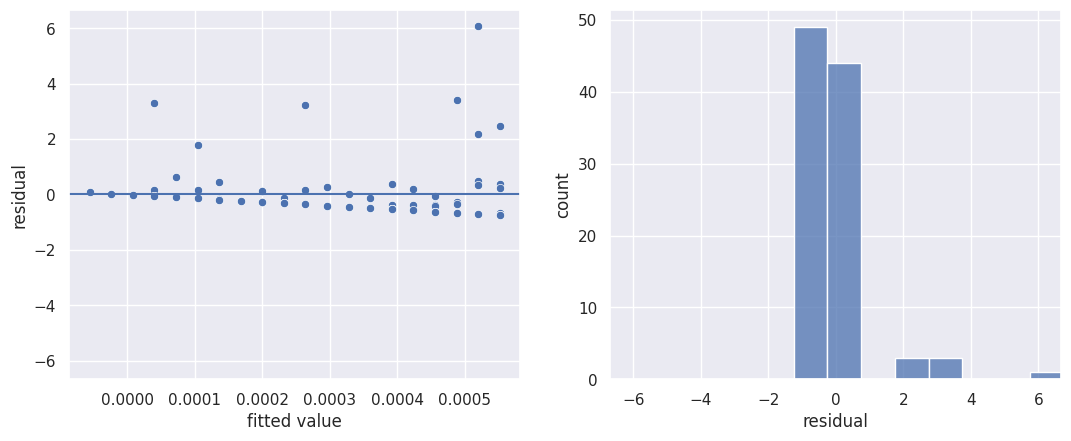

In [56]:
result.plot_residuals()

## DF 2020

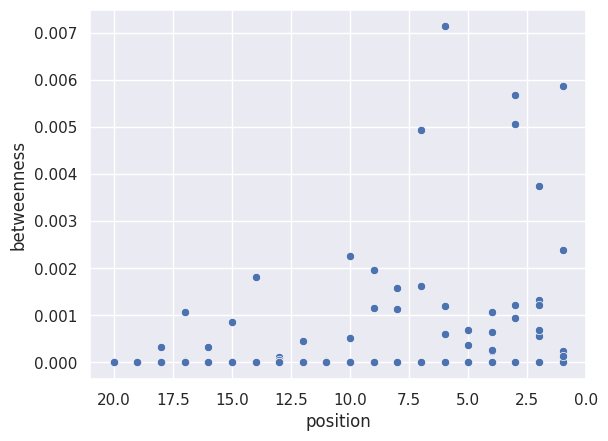

In [57]:
sns.scatterplot(x=df_2020['position'], y=df_2020['betweenness']);
plt.xlim(max(df_2020['position']+1), min(df_2020['position']-1))
plt.show()

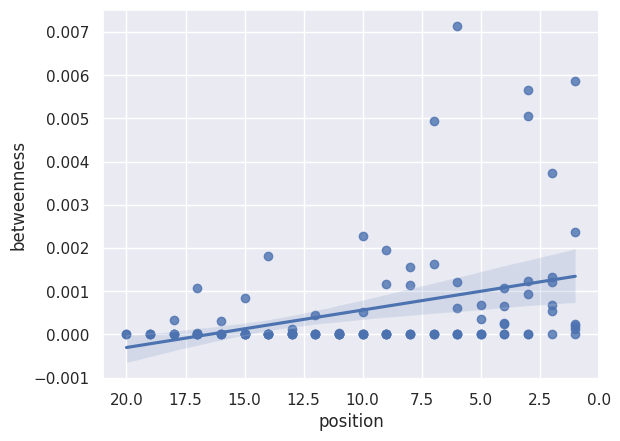

In [58]:
sns.regplot(x=df_2020['position'], y=df_2020['betweenness']);
plt.xlim(max(df_2020['position']+ 1), min(df_2020['position'])-1)
plt.show()

In [59]:
result_2020 = reg.linear(data=df_2020, formula='betweenness ~ position')

In [60]:
result_2020.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            betweenness   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     15.14
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           0.000177
Time:                        16:19:41   Log-Likelihood:                 554.12
No. Observations:                 105   AIC:                            -1104.
Df Residuals:                     103   BIC:                            -1099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.000      5.756      0.000       0.001       0.002
position   -8.679e-05   2.23e-05     -3.891      0.000      -0.000   -4.26e-05
==============================================================================
Omnibus:                       83.773   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.897
Skew:                           2.796   Prob(JB):                    5.08e-106
Kurtosis:                      11.920   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
result_2020.micro_summary()

variable,coefficient,std error,p-value
position,-0.000087,0.000022,0.000177


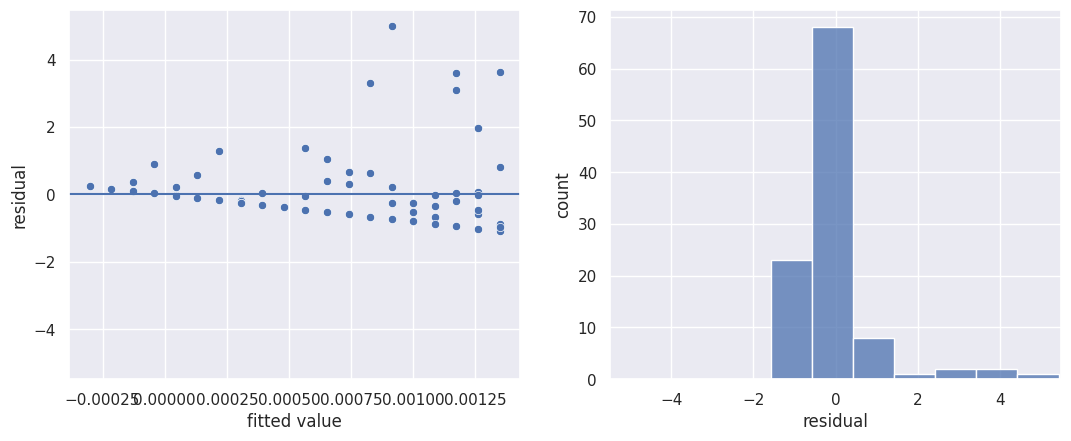

In [62]:
result_2020.plot_residuals()